# PRUEBA CIENTÍFICO DE DATOS:

## Introducción:

Como parte del equipo de DATA de COINK, te han solicitado diseñar esta prueba para evaluar tu creatividad, habilidad para aprender información nueva y conocimientos de Machine Learning.

El siguiente análisis contiene el conjunto de respuestas de acuerdo a las pruebas técnicas para el proceso de selección al cargo de científico de datos, este Notebook esta desarrollado en lenguaje de programación Python. 

## Retos:
### Parte 1: Métricas de evaluación desempeño de la compañia.

1.	Para ello usará una base de depósitos en Oinks (depositos_oink.csv). Los Oinks son máquinas en los que la gente puede depositar sus ahorros. Con ella debe construir una métrica que evalúe qué tan buenos (bajo su propio criterio) son los usuarios de Coink y calificar a los usuarios contenidos en la muestra. Cualquier gráfica para aclarar su métrica es bienvenida (use la herramienta de visualización que mejor crea conveniente).


### Parte 2: Modelo de ML que sea implementado en AWS.

2. Este debe tener la capacidad de ser ejecutado a demanda con un API. No se preocupe por el origen de la base de datos y la forma en la que se hace el enlace entre el API y la aplicación. Explique brevemente (no más de 300 palabras) cómo haría este proceso. Para mayor entendimiento puede consultar el siguiente enlace:

https://aws.amazon.com/es/blogs/machine-learning/call-an-amazon-sagemaker-model-endpoint-using-amazon-api-gateway-and-aws-lambda/



### Parte 3: Modelos de aprendizaje supervisado

3. En este punto tendrá una base con datos públicos (info_satisfaccion_trabajo.xlsx) con la cual deberá desarrollar un script con 2 modelos de aprendizaje supervisado para predecir la variable JobSatisfaction. Se espera que su procedimiento sea claro y que evalúe el desempeño de su modelo. En menos 150 palabras explique cómo monitorearía este modelo en caso en caso de que estuviera desplegado para uso recurrente de la empresa

## 0. Instalar librerías: 

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Parte 1: Métricas de evaluación desempeño de la compañia.

### Carga el conjunto de datos depositos_oink.

In [3]:
depositos_oinks = pd.read_csv('depositos_oinks.csv')

### 1.1 Breve análisis exploratorio de los datos.

La base de datos depositos_oink es de clase DataFrame el cual contiene 4.344 observaciones distribuidas en 5 columnas, los datos corresponden a información cualitativa y cuantitativa los cuales no presentan datos NULL.

In [4]:
print(depositos_oinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4345 non-null   int64  
 1   user_id           4345 non-null   object 
 2   operation_value   4345 non-null   float64
 3   operation_date    4345 non-null   object 
 4   maplocation_name  4345 non-null   object 
 5   user_createddate  4345 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 203.8+ KB
None


Las métricas que considero por la cual se podría evaluar a los clientes esta encaminada a la cantidad de transacciones que realiza el usuario y los montos que acumula en un periodo determinado, para esto se calcula la frecuencia de depósitos por usuario según la base de datos, y se calcula el valor total de depósitos por usuario, con esto podremos realizar una clasificación si el usuario es recurrente en nuestras plataformas y su buen habito de ahorro. 

En el siguiente código se imprime el top 10 de los usuarios con mayores depósitos según la base de datos, lo que muestra que un usuario top realiza deposito entre 23 a 61 operaciones. 

In [5]:
frecuencia_depositos = depositos_oinks.groupby('user_id')['operation_date'].count().reset_index(name='frecuencia')

top_10_frecuencia = frecuencia_depositos.nlargest(10, 'frecuencia')

print(top_10_frecuencia)

                                   user_id  frecuencia
430   47e76d57-09d3-4ea4-8531-9b839d83069e          61
1164  b88c1107-1d71-4782-bcc9-285877d89b1a          44
281   2df8831e-a37a-4ba7-b8f0-ec7c313d68af          39
908   8f64a145-013a-4d76-85f5-9a0c6aaf3ee2          37
1359  d38ae321-26b9-454b-9297-7c58068b4376          32
283   2e31bffe-ea66-44ec-8647-56d0fbab0516          27
689   6f556718-552b-4f6e-a5b2-e5f06ceb5e74          26
1175  b99b3b89-8d45-4656-a950-c85f202897b1          25
261   2b9d276a-54e5-4837-ab8d-cd7ec0e89ea5          23
1283  c82a388c-b06b-4bd4-882c-faa5d776d325          23



También se realiza un top con el monto total de depósitos realizados por usuarios, lo que muestra que existen ahorros superiores a *$1.800.000* pesos, adicional se observa que el usuario con mayor ahorro según base de datos es de *$7.032.500* pesos, este usuario realizo en total 39 transacciones.


In [6]:
# Calcular el valor total de depósitos por usuario
valor_total_depositos = depositos_oinks.groupby('user_id')['operation_value'].sum().reset_index(name='Total_Deposito')

top_10_depositos = valor_total_depositos.nlargest(10, 'Total_Deposito')

print(top_10_depositos)

                                   user_id  Total_Deposito
281   2df8831e-a37a-4ba7-b8f0-ec7c313d68af       7032500.0
1193  bca25e38-433b-476d-ad35-54096c119bf2       4108200.0
1164  b88c1107-1d71-4782-bcc9-285877d89b1a       3777650.0
632   65f16a4a-1c99-4e31-8bd4-9794e992feaf       3622800.0
689   6f556718-552b-4f6e-a5b2-e5f06ceb5e74       2371100.0
232   265d59b2-2175-4ad3-af85-eb6ee0d8b2d6       2326550.0
1211  be3f152d-6a66-42b4-bec0-e405080751ac       2290500.0
733   75bcf93d-45dc-4705-9ab4-cb248d7ab949       2171450.0
174   1aff40dc-fa88-43ee-8b57-6aafd27573ea       2017300.0
999   9fe4047c-e718-4da6-8fd5-080f46fc2e2f       1834050.0


En este análisis también observa que el usuario que realizó más transacciones (61) no se encuentra en el top 10 de monto ahorrado, lo que indica que este usuario realizo transacciones de montos pequeños, de acuerdo a lo anterior se crea una métrica de “buen usuario” basada en la frecuencia y el valor de los depósitos.

Aquí se define una métrica simple que considera usuarios “buenos” si han realizado al menos *5* depósitos con un valor total a *$200.000* pesos.

Los anteriores lumbrales se puedes ajustar de acuerdo a la visión de negocio, estrategia, el mes que se consulte o demás que la organización requiera.
 


In [7]:
# Crear métrica de "buen usuario" basada en la frecuencia y el valor de los depósitos

frecuencia_depositos = depositos_oinks.groupby('user_id')['operation_date'].count()
valor_total_depositos = depositos_oinks.groupby('user_id')['operation_value'].sum()
def buen_usuario(user_id):
    if frecuencia_depositos[user_id] >= 5 and valor_total_depositos[user_id] > 200000:
        return 'Buen usuario'
    else:
        return 'No buen usuario'

# Aplicar la métrica a cada usuario
depositos_oinks['calificacion'] = depositos_oinks['user_id'].apply(buen_usuario)

In [8]:
# Se observa la creación de la métrica “Calificación” en la base de datos. 
depositos_oinks.head(5)

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate,calificacion
0,0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689,Buen usuario
1,1,975ed41e-d891-4c23-aeba-06363019d8e3,900.0,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075,No buen usuario
2,2,f9043545-dfc2-402f-a8c7-0a61f21cb719,1800.0,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941,No buen usuario
3,3,979ca8ad-9600-4a1f-81e9-e70c2f55cdc5,6500.0,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291,No buen usuario
4,4,171db06e-2e4b-4542-a9c9-32028520fda4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994,No buen usuario


In [19]:
# Calcular el porcentaje de 'Buen usuario' y 'No buen usuario'
porcentaje_buenos = (depositos_oinks['calificacion'].value_counts()['Buen usuario'] / len(depositos_oinks)) * 100
porcentaje_malos = (depositos_oinks['calificacion'].value_counts()['No buen usuario'] / len(depositos_oinks)) * 100

# Calcular la suma de ahorro por 'Buen usuario' y 'No buen usuario'
suma_buen_usuario = depositos_oinks.loc[depositos_oinks['calificacion'] == 'Buen usuario', 'operation_value'].sum()
suma_no_buen_usuario = depositos_oinks.loc[depositos_oinks['calificacion'] == 'No buen usuario', 'operation_value'].sum()

# Mostra Los resultados:
print(f"Monto total por 'Buen usuario': {suma_buen_usuario}")
print(f"Monto total por 'No buen usuario': {suma_no_buen_usuario}")
print(f"Porcentaje de 'Buen usuario': {porcentaje_buenos}%")
print(f"Porcentaje de 'No buen usuario': {porcentaje_malos}%")

Monto total por 'Buen usuario': 59616850.0
Monto total por 'No buen usuario': 90799900.0
Porcentaje de 'Buen usuario': 15.926352128883774%
Porcentaje de 'No buen usuario': 84.07364787111624%


De acuerdo a estos parámetros se observa que cerca del 16% de los clientes se encuentra calificada como “Buen usuario” Representado por un ahorro superior a *$59 Millones de pesos*, el resto (84%) no cumple con el criterio de 5 depositos y un ahorro superior de $200.000, estos acumulan un ahorro superior de *$84 Millones de pesos*

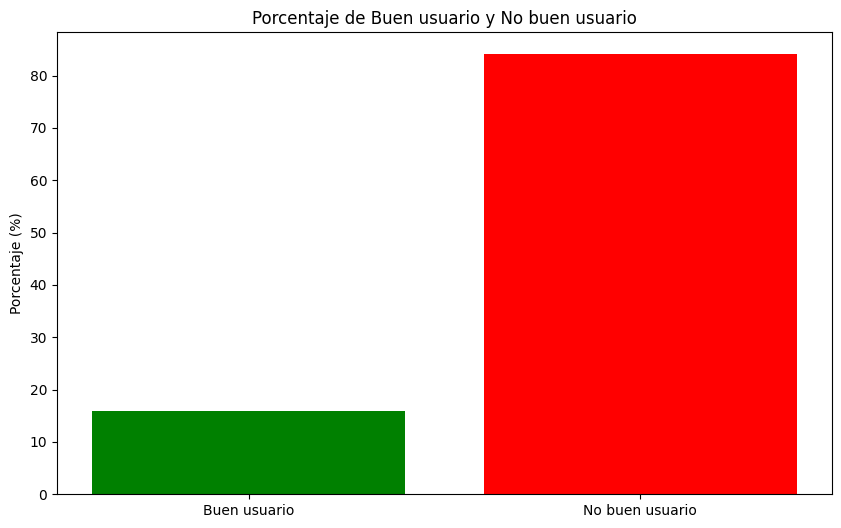

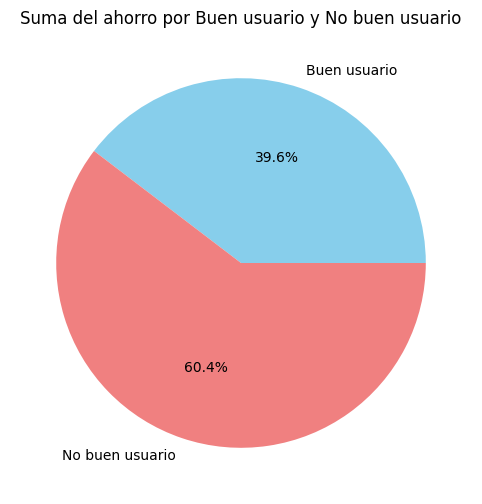

In [24]:
# Crear un gráfico de barras para mostrar el porcentaje de 'Buen usuario' y 'No buen usuario'
plt.figure(figsize=(10, 6))
plt.bar(['Buen usuario', 'No buen usuario'], [porcentaje_buenos, porcentaje_malos], color=['green', 'red'])
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Buen usuario y No buen usuario')

# Mostrar la suma del ahorro y la cantidad de usuarios únicos en un gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie([suma_buen_usuario, suma_no_buen_usuario], labels=['Buen usuario', 'No buen usuario'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Suma del ahorro por Buen usuario y No buen usuario')

plt.show()

## Recomendaciones de Negocio:

De acuerdo a los resultados obtenidos con anterioridad, realizo las siguientes recomendaciones para fomentar el ahorro de nuestros clientes y disminuir los retiros en nuestras alcancías digitales:

1.	Crear estrategias con los clientes para realzar trasferencias programadas desde sus cuentas de nómina, pensión u otras cuentas donde los clientes reciben sus ingresos, lo anterior con el fin de incrementar el hábito del ahorro.

2.	Establecer metas de ahorro, lo anterior con el fin de ofrecer a nuestros usuario ahorros que permitan cumplir sus metas, Coink dispondrá de recursos por mayor tiempo disponible.  

3.	Ofrecer recompensas por ahorro, incentivar a los clientes mediante objetivos específicos de ahorro los cuales los beneficien con incentivos económicos y no económicos.

4.	Proporcionar educación financiera, mediante la inclusión financiera establecida, poder acompañar a nuestros clientes en el conocimiento del portafolio financiero, creando la necesidad de un buen hábito de ahorro responsable y seguro.

5.	 Para mitigar el riesgo de retiros masivos de nuestras alcancías OINKS, establecer junto al cliente limites de retiros diarios, permitiendo cumplir sus metas de ahorro. 

6.	Ofrecer a los clientes diversas formas de inversión de sus ahorros.


## Parte 2: Modelo de ML que sea implementado en AWS.

Para crear el modelo de Machine Learning que se ejecute a demanda con una API en AWS, seguiría los siguientes pasos:

1.	Desarrollo del modelo de ML, utilizaría tres tipos de modelos:

    A.	Clasificación binaria

    B.	Modelo de clasificación multiclase.

    C.	Modelo de regresión.  

2.	Creación de un punto final de SageMaker : tendría en cuenta lo siguientes parámetros:

    A.	Tamaño máximo del volumen de Amazon EBS.

    B.	Cuota de tiempo de espera de las comprobaciones de estado.

    C.	Cuota de tiempo de espera de descarga del modelo.

3.	Creación de una función Lambda: Crearía una función AWS Lambda que se encargue de recibir las solicitudes de entrada.

4.	Creación de un API Gateway: Crearía un API Gateway que se encargue de recibir las solicitudes de entrada del modelo.

5.	Configuración de la integración.

6.	Pruebas y despliegue: en tiempo Real.

De esta manera, el modelo de ML se ejecutará a demanda cuando se reciban solicitudes de entrada a través del API Gateway, y se devolverán los resultados a los clientes.


## Parte 3: Modelos de aprendizaje supervisado


### Carga el conjunto de datos info_satisfaccion_trabajo.xlsx

In [4]:
satisfaccion_trabajo = pd.read_excel('info_satisfaccion_trabajo.xlsx')

### MODELO 1. REGRESÍON LOGÍSTICA. 

Librerias: 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = satisfaccion_trabajo.drop('JobSatisfaction', axis=1)
y = satisfaccion_trabajo['JobSatisfaction']

In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas categóricas para codificar
categorical_cols = X.select_dtypes(include=['object']).columns

# Crear un transformador para codificar las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)


In [23]:
# Crear un pipeline con el preprocesamiento y el modelo de regresión logística
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [24]:
# Entrenar el modelo
model.fit(X_train, y_train)

c:\Users\Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [25]:
# Realizar predicciones y evaluar la precisión del modelo
accuracy = model.score(X_test, y_test)
print("Accuracy of Logistic Regression model:", accuracy)

Accuracy of Logistic Regression model: 0.30612244897959184


Los resultados obtenidos al evaluar el modelo de regresión logística se reflejan en la precisión del modelo del 0.3061, que indica la proporción de predicciones correctas. 

Esta gráfica de la matriz de confusión te ayudará a visualizar cómo el modelo de regresión logística ha clasificado las predicciones en cada clase y a comprender mejor su desempeño.

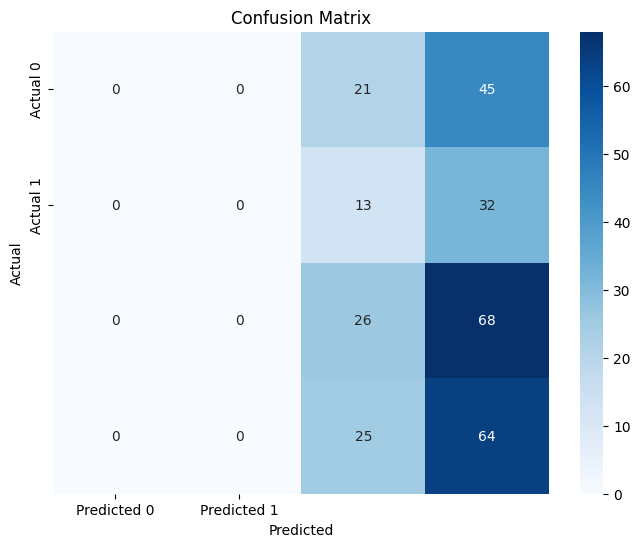

In [20]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, model.predict(X_test))

# Crear una visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Monitoreo de los Modelos: 

Para monitorear los modelos sugeridos que se encuentran en uso recurrente, se deben realizar los siguientes análisis:

1. análisis regulares de la precisión.

2. análisis de sensibilidad y la especificidad del modelo en datos de prueba actualizados.

3. Adicional, se pueden implementar alertas automáticas para detectar posibles cambios en el rendimiento del modelo y realizar ajustes si es necesario.

4. El monitoreo continuo garantizará que el modelo siga siendo preciso y relevante para la empresa.

El anterior ejemplo utilice el modelo de aprendizaje supervisado de regresión logística, pero se recomienda realizar modelos de árboles de decisión, support vector machines (SVM), redes neuronales, K-nearest neighbor, naive bayes, regresión lineal, random forest, gradient boosting los cuales se pueden ajustar a las necesidades del negocio y estructura de las bases de datos. especificas.
